# ML Project: Vehicle Performance Prediction

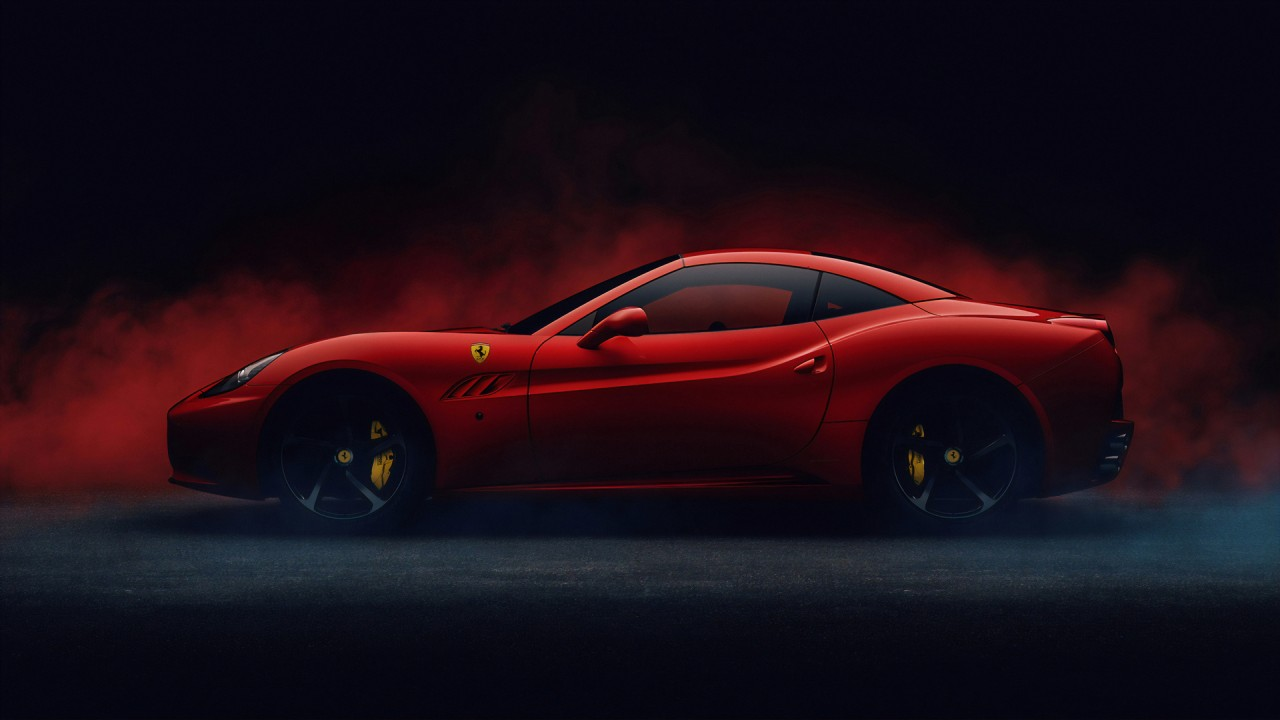

# Introduction
In this project, we will develop a machine learning model to predict vehicle performance metrics such as fuel efficiency (miles per gallon - MPG) based on various features such as engine size, horsepower, weight, and other relevant attributes. We'll use a dataset from UCI Machine Learning Repository, specifically the "Auto MPG" dataset.

# Project Workflow
1. **Data Collection**
<br>

2. **Data Exploration and Cleaning**
<br>
3. **Feature Engineering**
<br>
4. **Model Selection**
<br>
5. **Model Training**
<br>
6. **Model Evaluation**
<br>
7. **Prediction**

# Step 1: Data Collection
We'll load the dataset from the UCI repository using pandas.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Load dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"



print(url)

http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data


In [5]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model year', 'origin', 'car name']


In [6]:
data = pd.read_csv(url, names=column_names, 
                   delim_whitespace=True, 
                   na_values="?")

In [9]:
data.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu


# Step 2: Data Exploration and Cleaning
We'll explore the dataset to understand its structure, check for missing values, and perform basic cleaning.

In [10]:
# Summary statistics
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
data.loc[4,:]

mpg                    17.0
cylinders                 8
displacement          302.0
horsepower            140.0
weight               3449.0
acceleration           10.5
model year               70
origin                    1
car name        ford torino
Name: 4, dtype: object

In [13]:
data.shape

(398, 9)

In [25]:
# Check for missing values
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [14]:
# Drop rows with missing values
data.dropna(inplace=True)

In [15]:
data.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,14.0,8,350.0,165.0,4209.0,12.0,71,1,chevrolet impala


In [17]:
# Drop the 'car name' column as it's not relevant for prediction
data.drop('car name', axis=1, inplace=True)
print('done')

done


In [19]:
data.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
105,13.0,8,360.0,170.0,4654.0,13.0,73,1


In [20]:
data['origin']

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 392, dtype: int64

# Step 3: Feature Engineering
We'll perform any necessary feature engineering, such as creating dummy variables for categorical features.

In [28]:
# Convert 'origin' to categorical
data['origin'] = data['origin'].astype('category')

In [21]:
# Create dummy variables for 'origin'
data = pd.get_dummies(data, 
                      columns=['origin'], 
                      drop_first=True,dtype=int)


In [23]:
# Display the first few rows of the modified dataset
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0


# Step 4: Model Selection
We'll choose a regression model for this task. For simplicity, let's start with a Linear Regression model.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into features and target
X = data.drop('mpg', axis=1)
y = data['mpg']

print('done')

done


In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)
print('done')

done


# Step 5: Model Training
We'll train the Linear Regression model on the training data.

In [27]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

# Step 6: Model Evaluation
We'll evaluate the model's performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)


# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


MAE: 2.461999698066142
MSE: 10.602279011688324
RMSE: 3.2561140968473947
R-squared: 0.7922774714022589


# Step 8: Prediction
We'll use the best model to make predictions on the test set and evaluate its performance.

In [37]:
print(y_pred)

[26.62308629 26.90246949 34.26598184 24.44117617 28.23541424 30.1825394
  8.56100481 30.34916333 20.38153598 29.44628713 12.74639826 24.90246444
 16.90383129 29.26573592 22.69002521 29.01139375 20.1273859  33.14407006
 26.35414107 30.96911914 18.62424125 35.63889895 35.27942909 14.81946638
 29.28017777 26.41101276 21.6842468  15.83161913 29.59833633 24.88379141
 13.37959723 23.41302619 20.81168747 31.62899703 12.3989298  36.04242383
 10.58135858 23.90100171 11.19643551  6.94845354 12.68311718 28.38719238
 35.88785647 27.18142137 11.91912268  9.97909932 17.40713084 32.34687072
 24.02663951 31.13303701 11.85297985 26.04081368 22.75426327 35.0138902
 28.42903068 17.61471732 20.25432749 22.65581157 23.40456421 25.50148875
  8.66368711 22.63841676 25.63063799 24.08991433 29.67539514 29.69088567
 25.44467515 30.32743592 21.76693112 10.23223165 22.36625882 13.27817334
 26.44180013 27.36701784 24.11507014 23.58214686 14.04239349 14.78545035
 25.19889588]


# Model Score

In [68]:
model.score(X_test,y_test)

0.7922774714022589

# Original Vs prediction

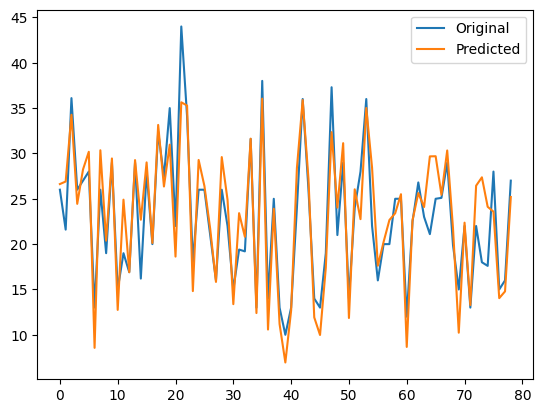

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(len(X_test)),y_test, label = 'Original')
plt.plot(range(len(X_test)),y_pred, label = 'Predicted')
plt.legend()

plt.savefig('All_Findings/original_vs_predicted.png')
plt.show()

# Task 
Save your Model